In [318]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [319]:
df = pd.read_csv('cleaned_data.csv')

In [320]:
df['default payment next month'].mean()

0.21920753178398014

In [321]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    21065
1     5914
Name: ID, dtype: int64

In [322]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [323]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0)
my_new_lr.C = 0.1
my_new_lr.solver = 'newton-cg'
my_new_lr


LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [324]:
X = df['LIMIT_BAL'][0:10].values.reshape(-1,1)
X

array([[ 20000],
       [120000],
       [ 90000],
       [ 50000],
       [ 50000],
       [ 50000],
       [500000],
       [100000],
       [140000],
       [ 20000]], dtype=int64)

In [325]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [326]:
my_new_lr.fit(X, y)

C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [327]:
new_X = df['LIMIT_BAL'][10:20].values.reshape(-1,1)
new_X

array([[200000],
       [260000],
       [630000],
       [ 70000],
       [250000],
       [ 50000],
       [ 20000],
       [360000],
       [180000],
       [130000]], dtype=int64)

In [328]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [329]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [330]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [331]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

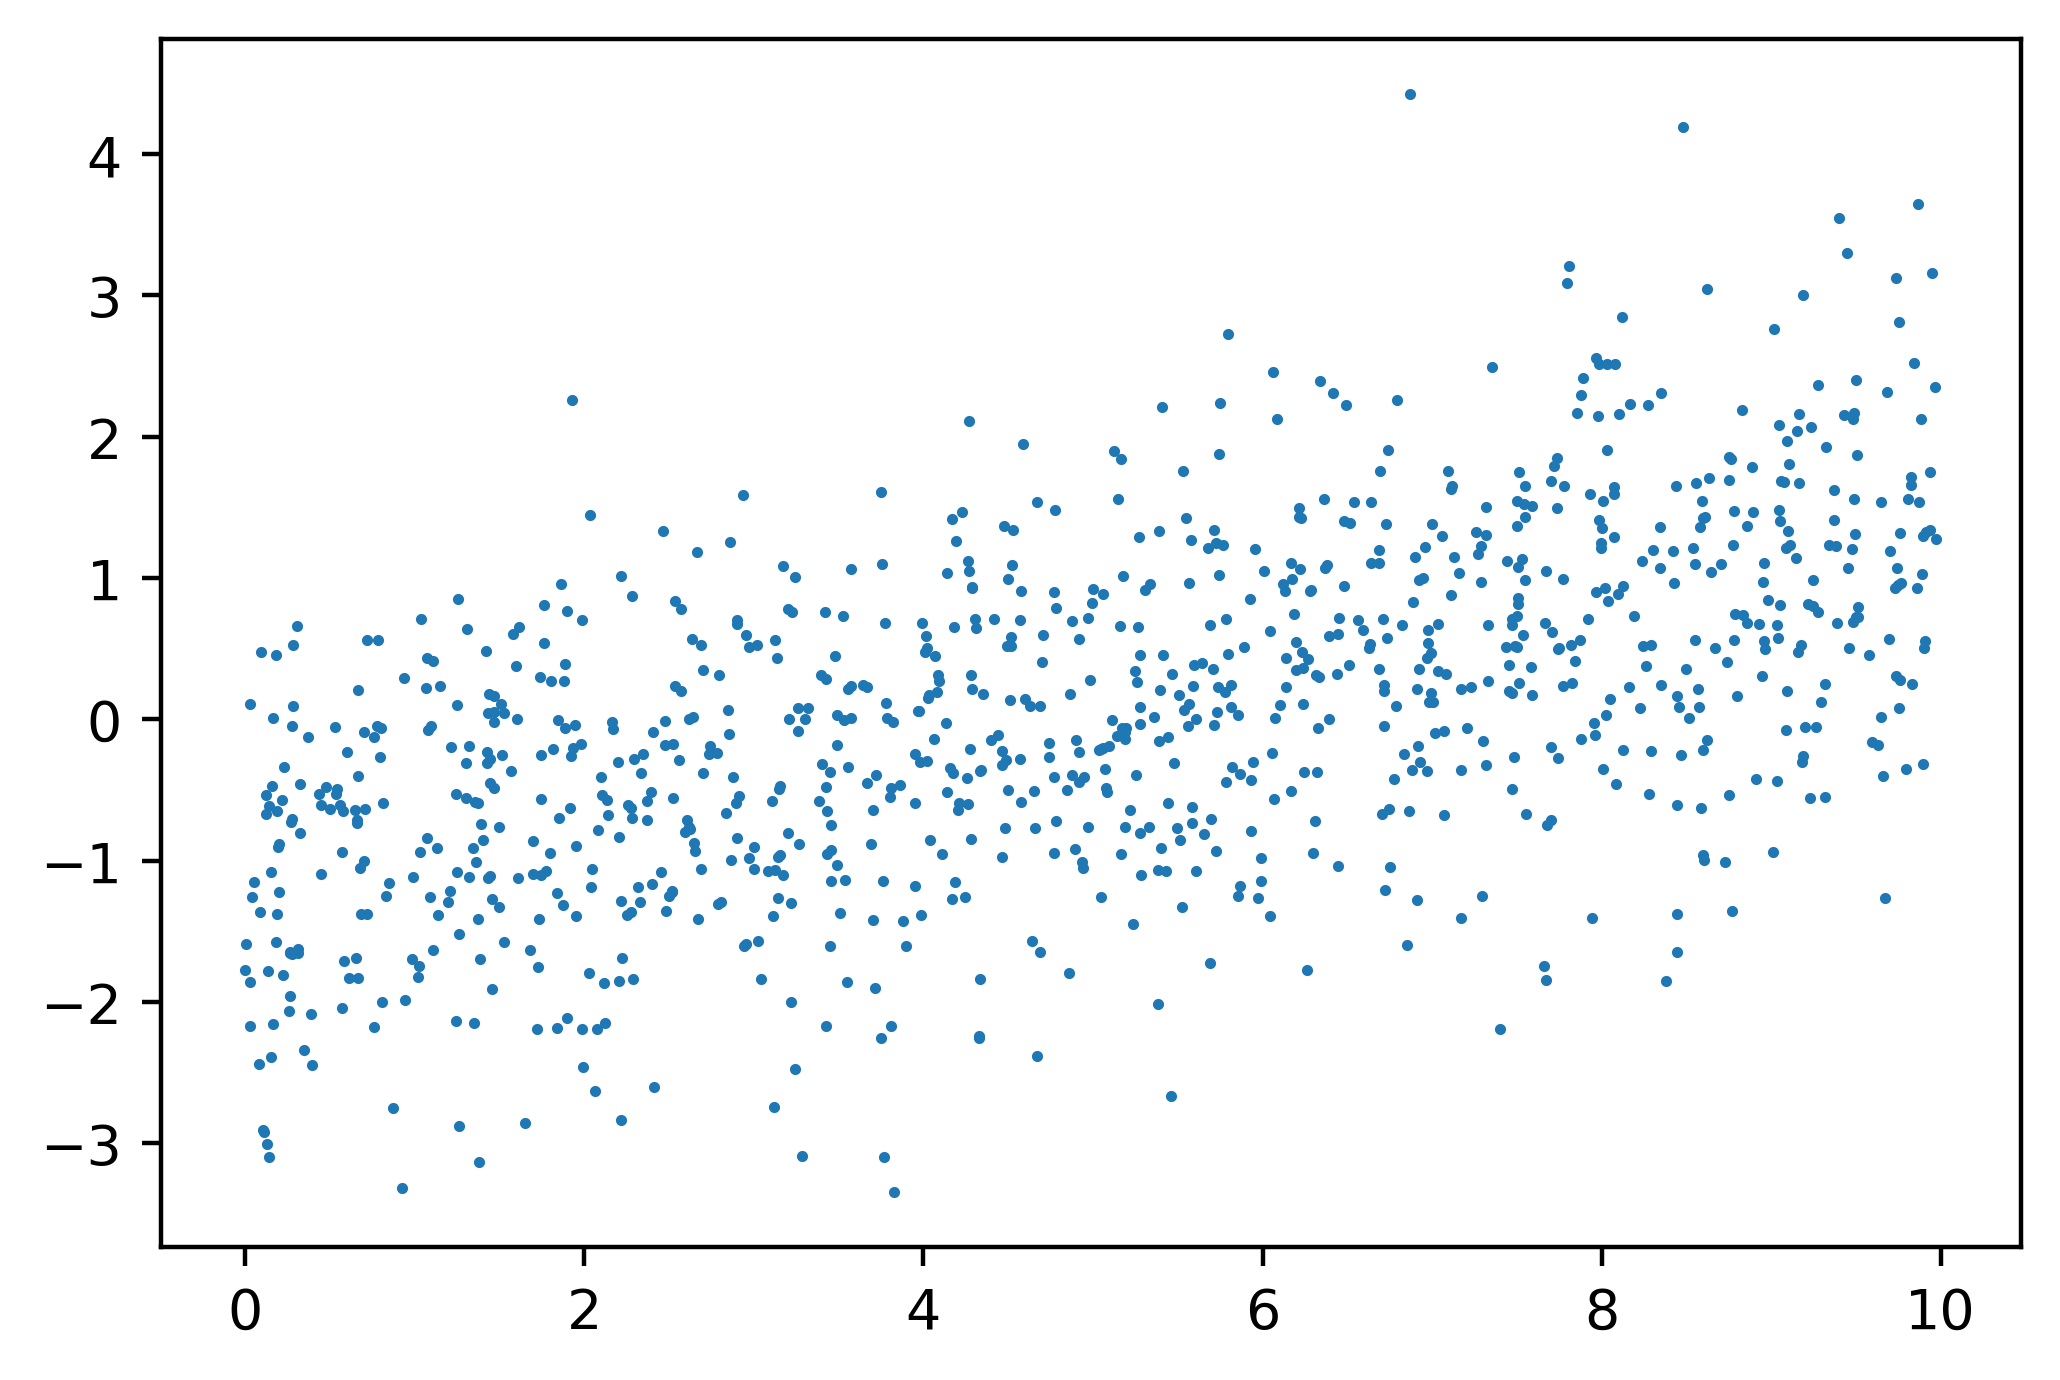

In [332]:
plt.scatter(X,y,s=1)

In [333]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [334]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [335]:
y_pred = lin_reg.predict(X.reshape(-1,1))

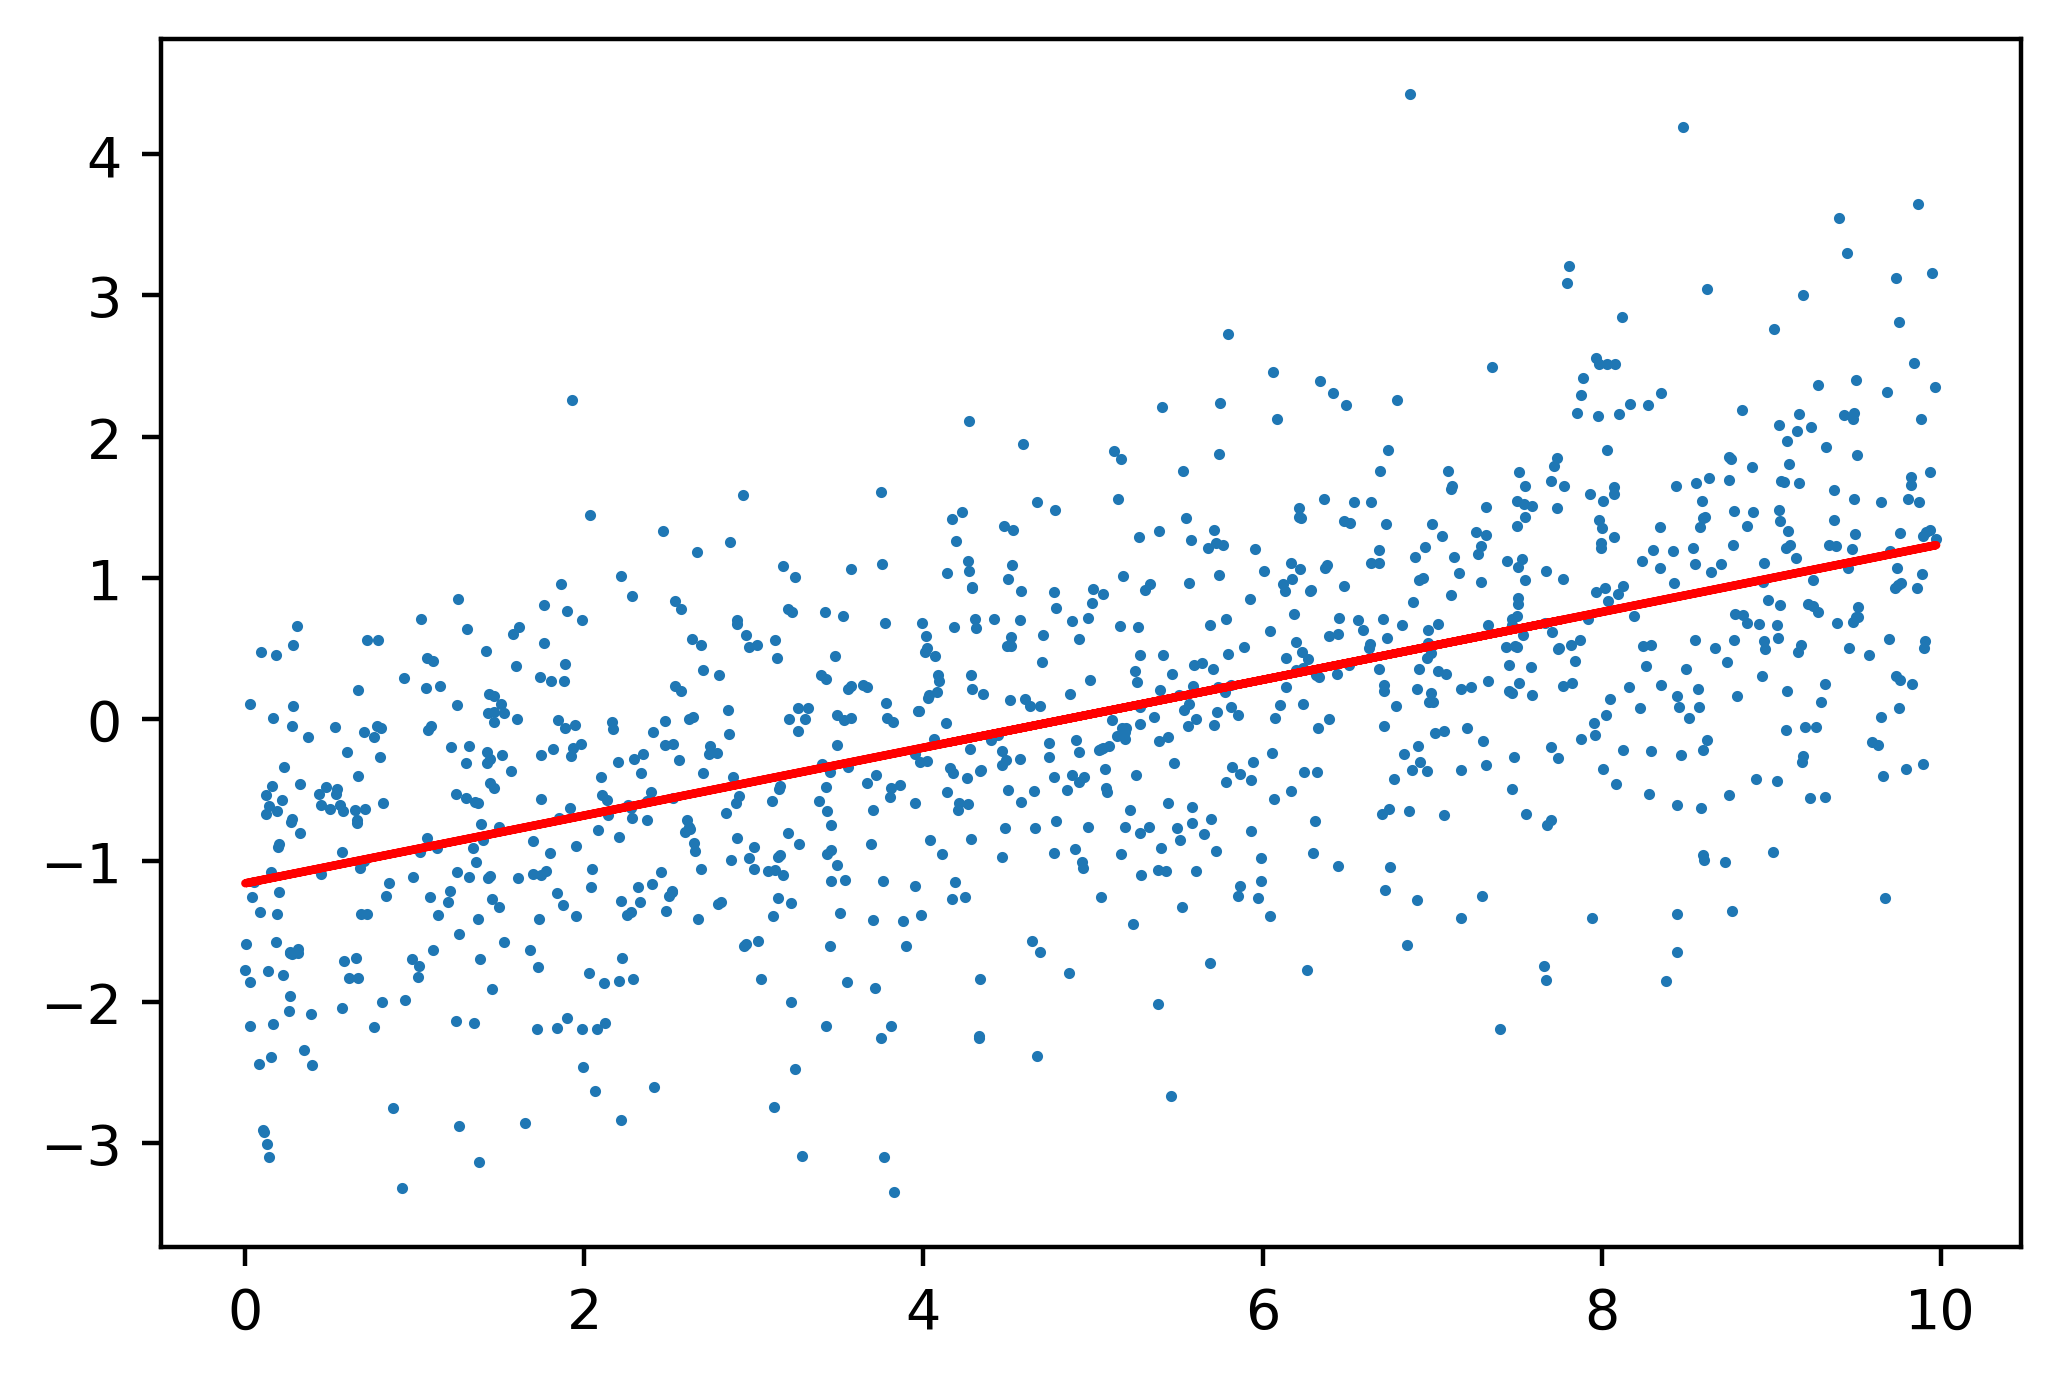

In [336]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [338]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21583, 1)
(5396, 1)
(21583,)
(5396,)


In [339]:
np.mean(y_train)

0.21970995691053144

In [340]:
np.mean(y_test)

0.21719792438843588

In [341]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='multinomial', n_jobs=None, \
                                penalty='l2', random_state=None, solver='newton-cg', tol=0.0001, \
                                verbose=0, warm_start=False)

In [342]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [343]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7828020756115641

In [344]:
example_lr.score(X_test, y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7828020756115641

In [345]:
P = sum(y_test)
P

1172

In [346]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [347]:
TPR = TP/P
TPR

0.0

In [348]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1172

In [349]:
FNR = FN/P
FNR

1.0

In [350]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [351]:
metrics.confusion_matrix(y_test, y_pred)

array([[4224,    0],
       [1172,    0]], dtype=int64)

In [352]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77327977, 0.22672023],
       [0.77951526, 0.22048474],
       [0.77327977, 0.22672023],
       ...,
       [0.7856268 , 0.2143732 ],
       [0.7856268 , 0.2143732 ],
       [0.77951526, 0.22048474]])

In [353]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [354]:
prob_sum.shape

(5396,)

In [355]:
np.unique(prob_sum)

array([1.])

In [356]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22672023, 0.22048474, 0.22672023, ..., 0.2143732 , 0.2143732 ,
       0.22048474])

(array([1877.,    0.,    0., 2524.,    0.,    0.,  844.,    0.,    0.,
         151.]),
 array([0.2143732 , 0.21624381, 0.21811443, 0.21998504, 0.22185565,
        0.22372627, 0.22559688, 0.2274675 , 0.22933811, 0.23120872,
        0.23307934]),
 <BarContainer object of 10 artists>)

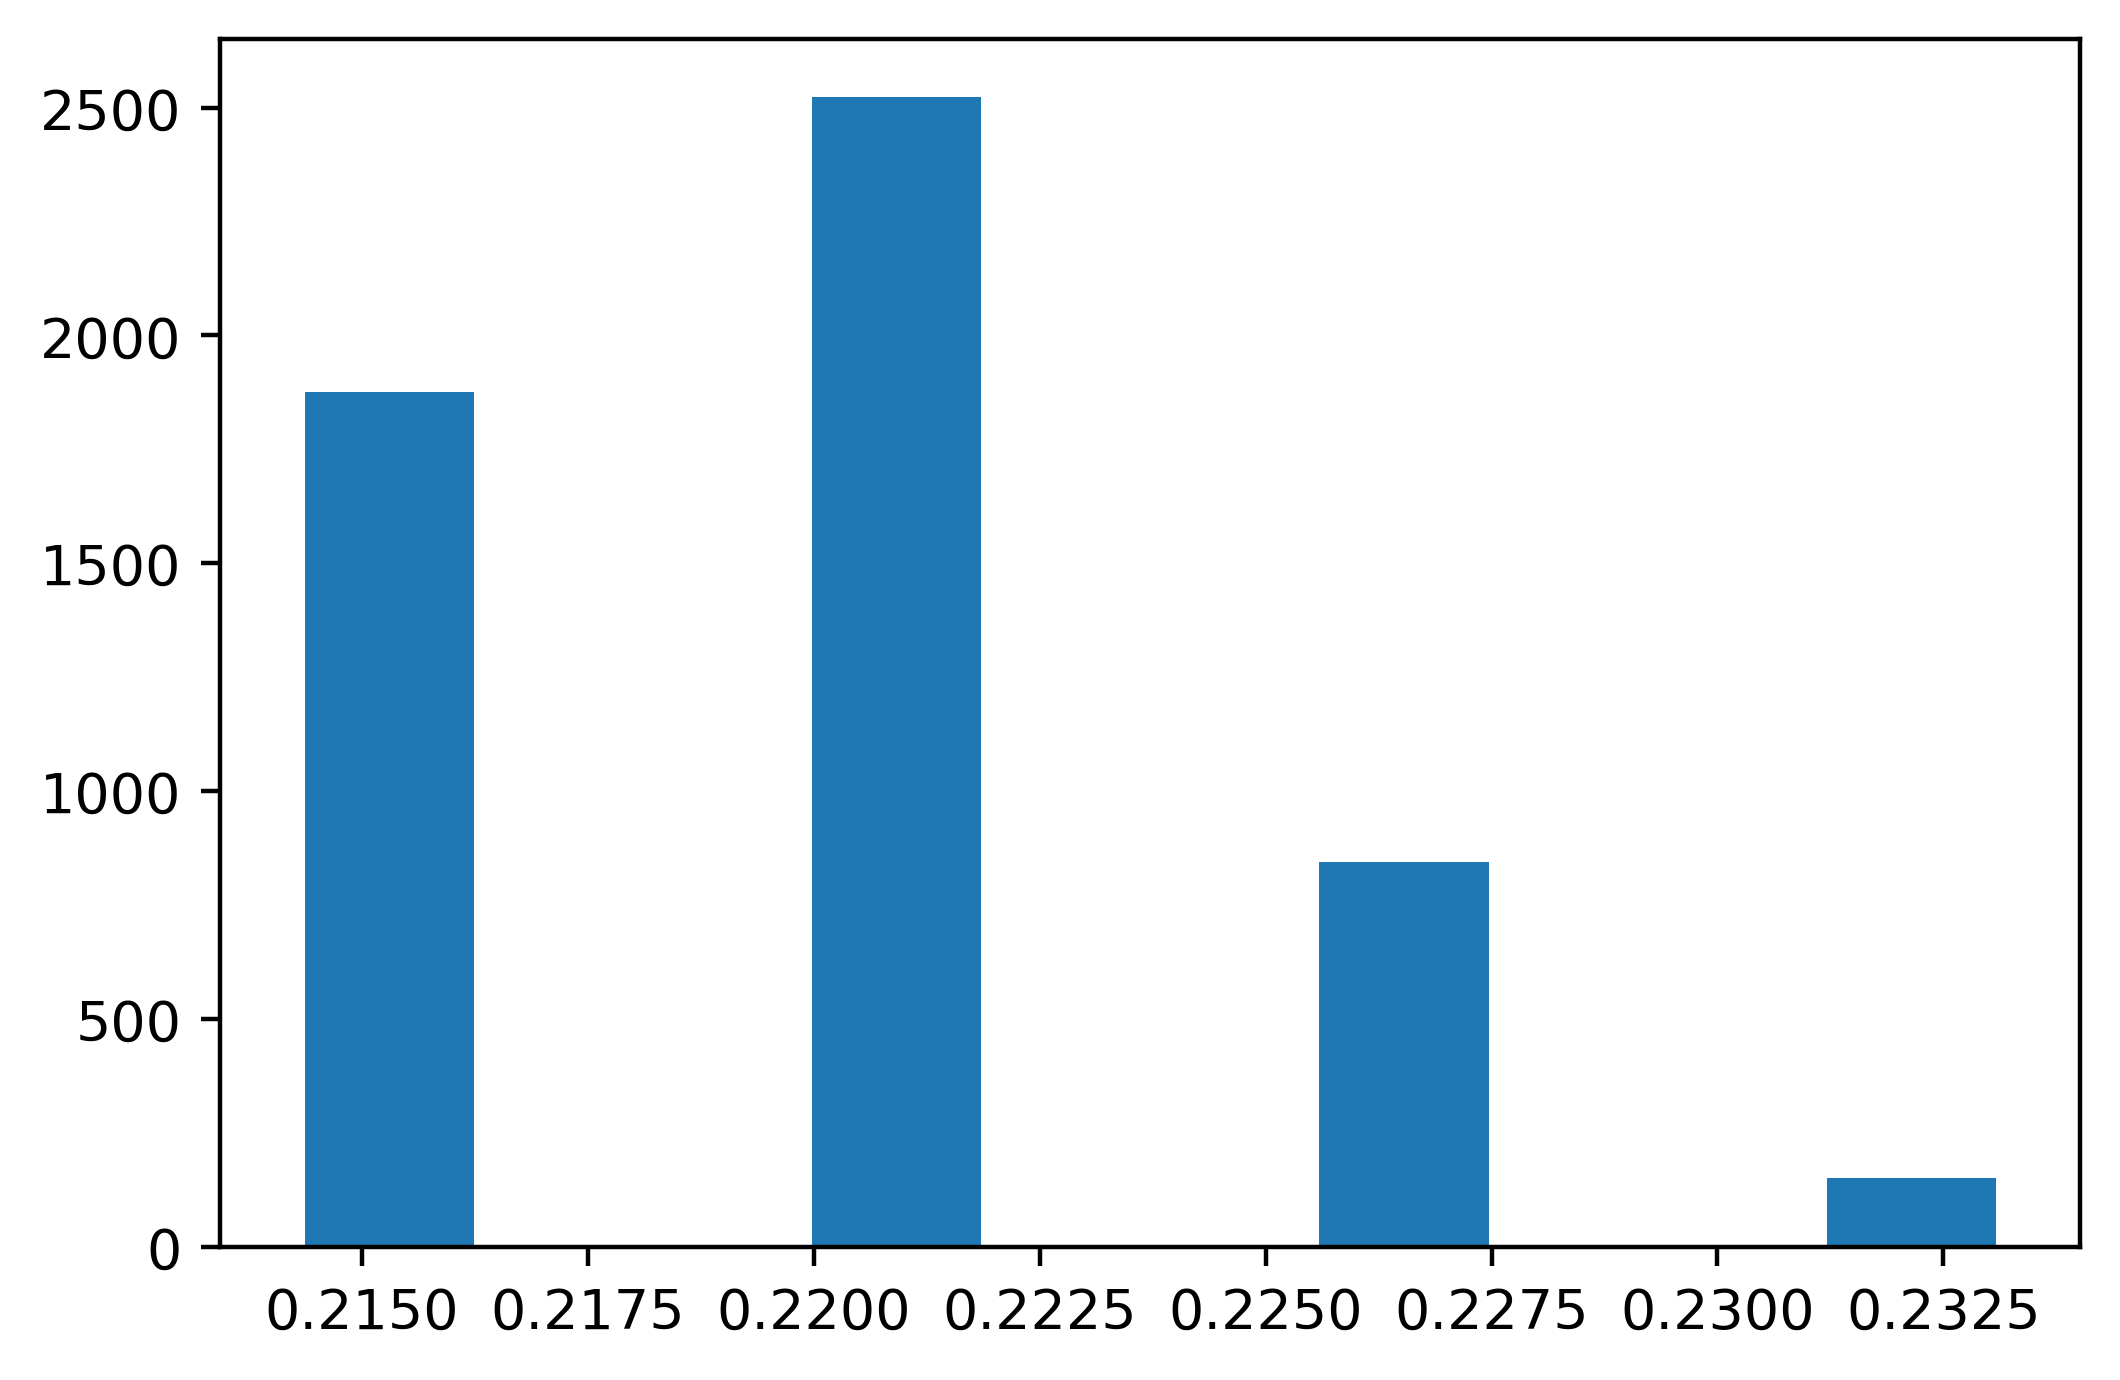

In [357]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

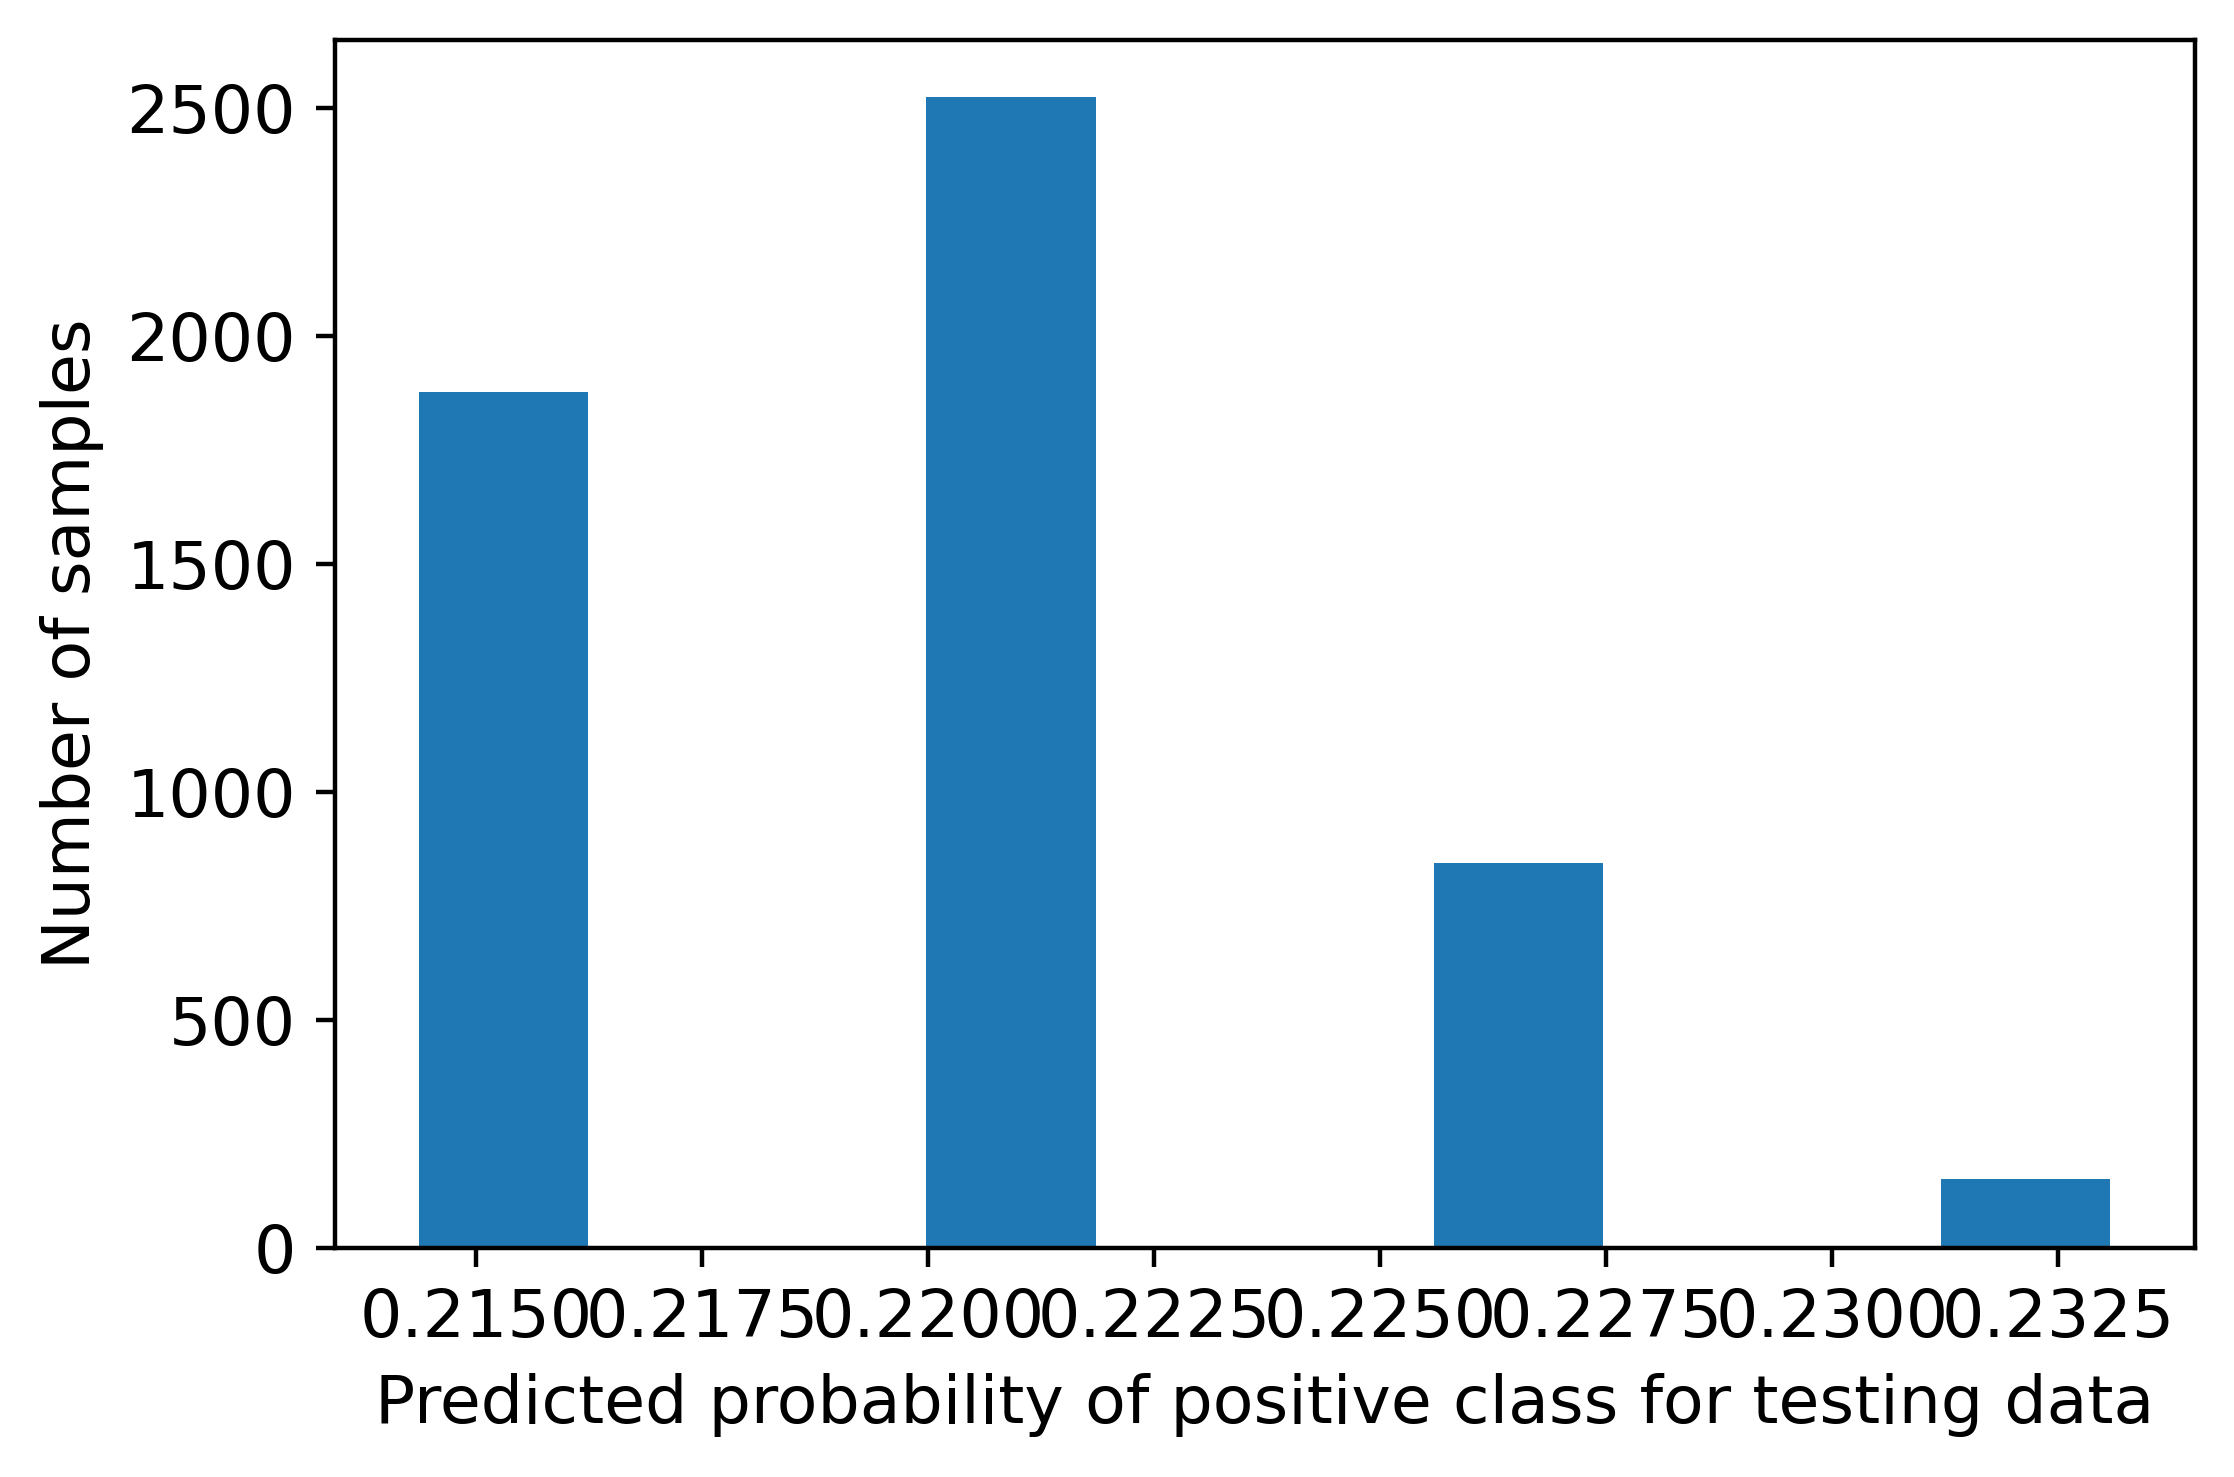

In [358]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [359]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

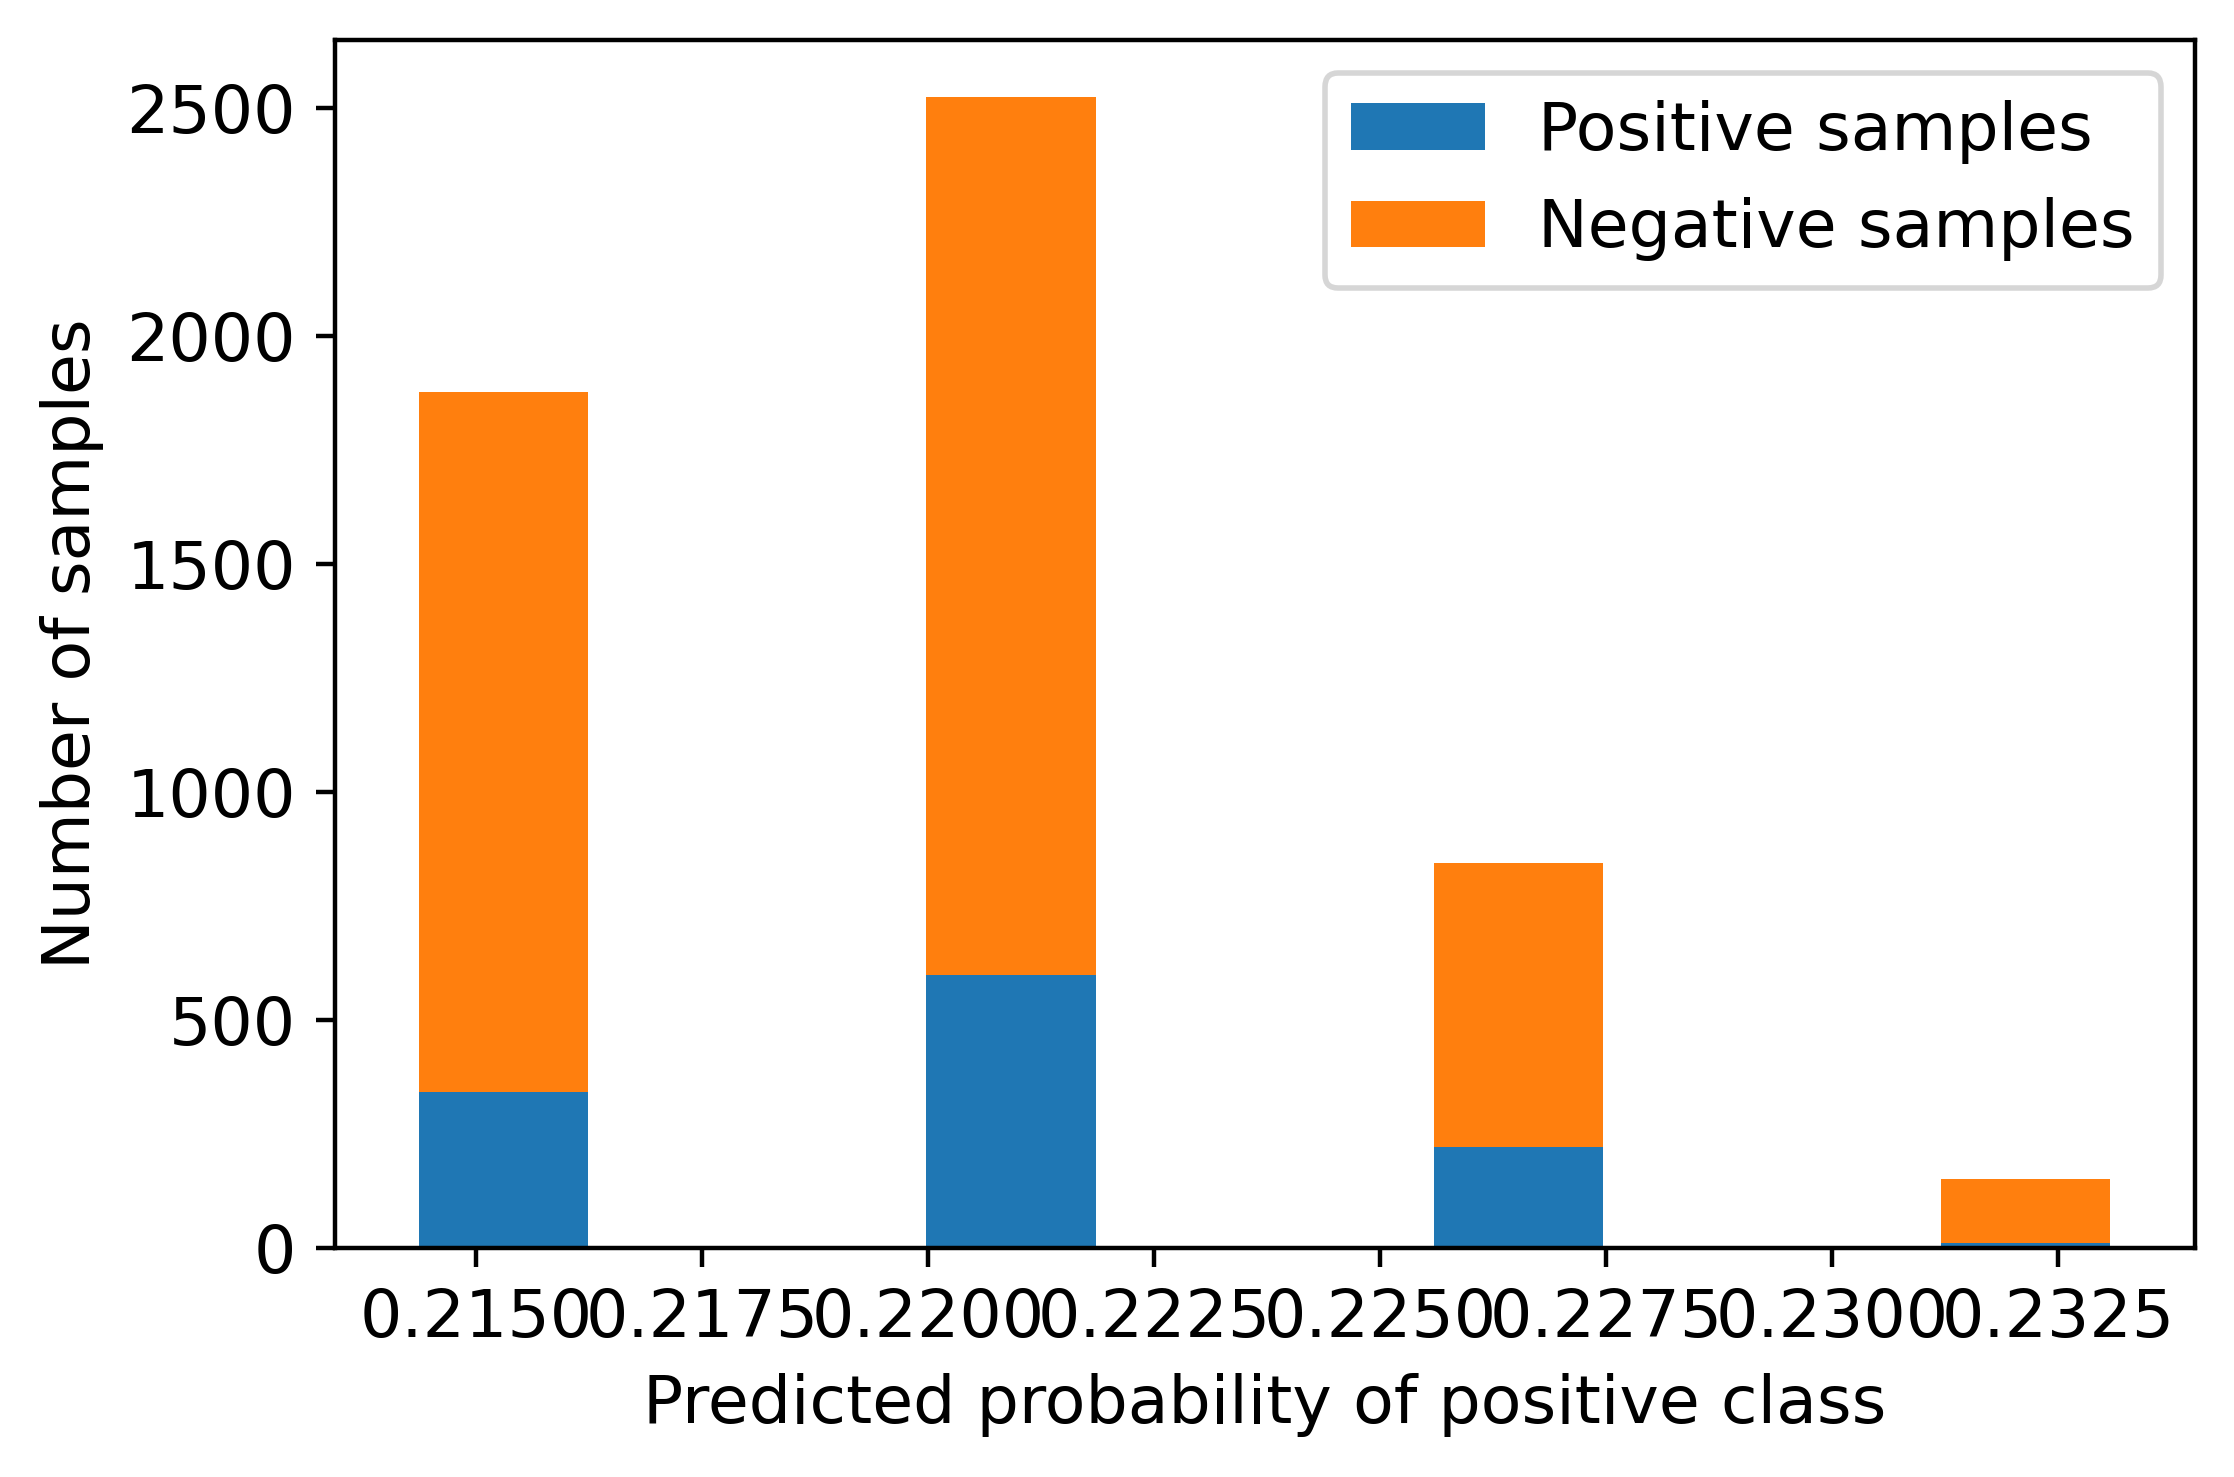

In [360]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Text(0.5, 1.0, 'ROC curve')

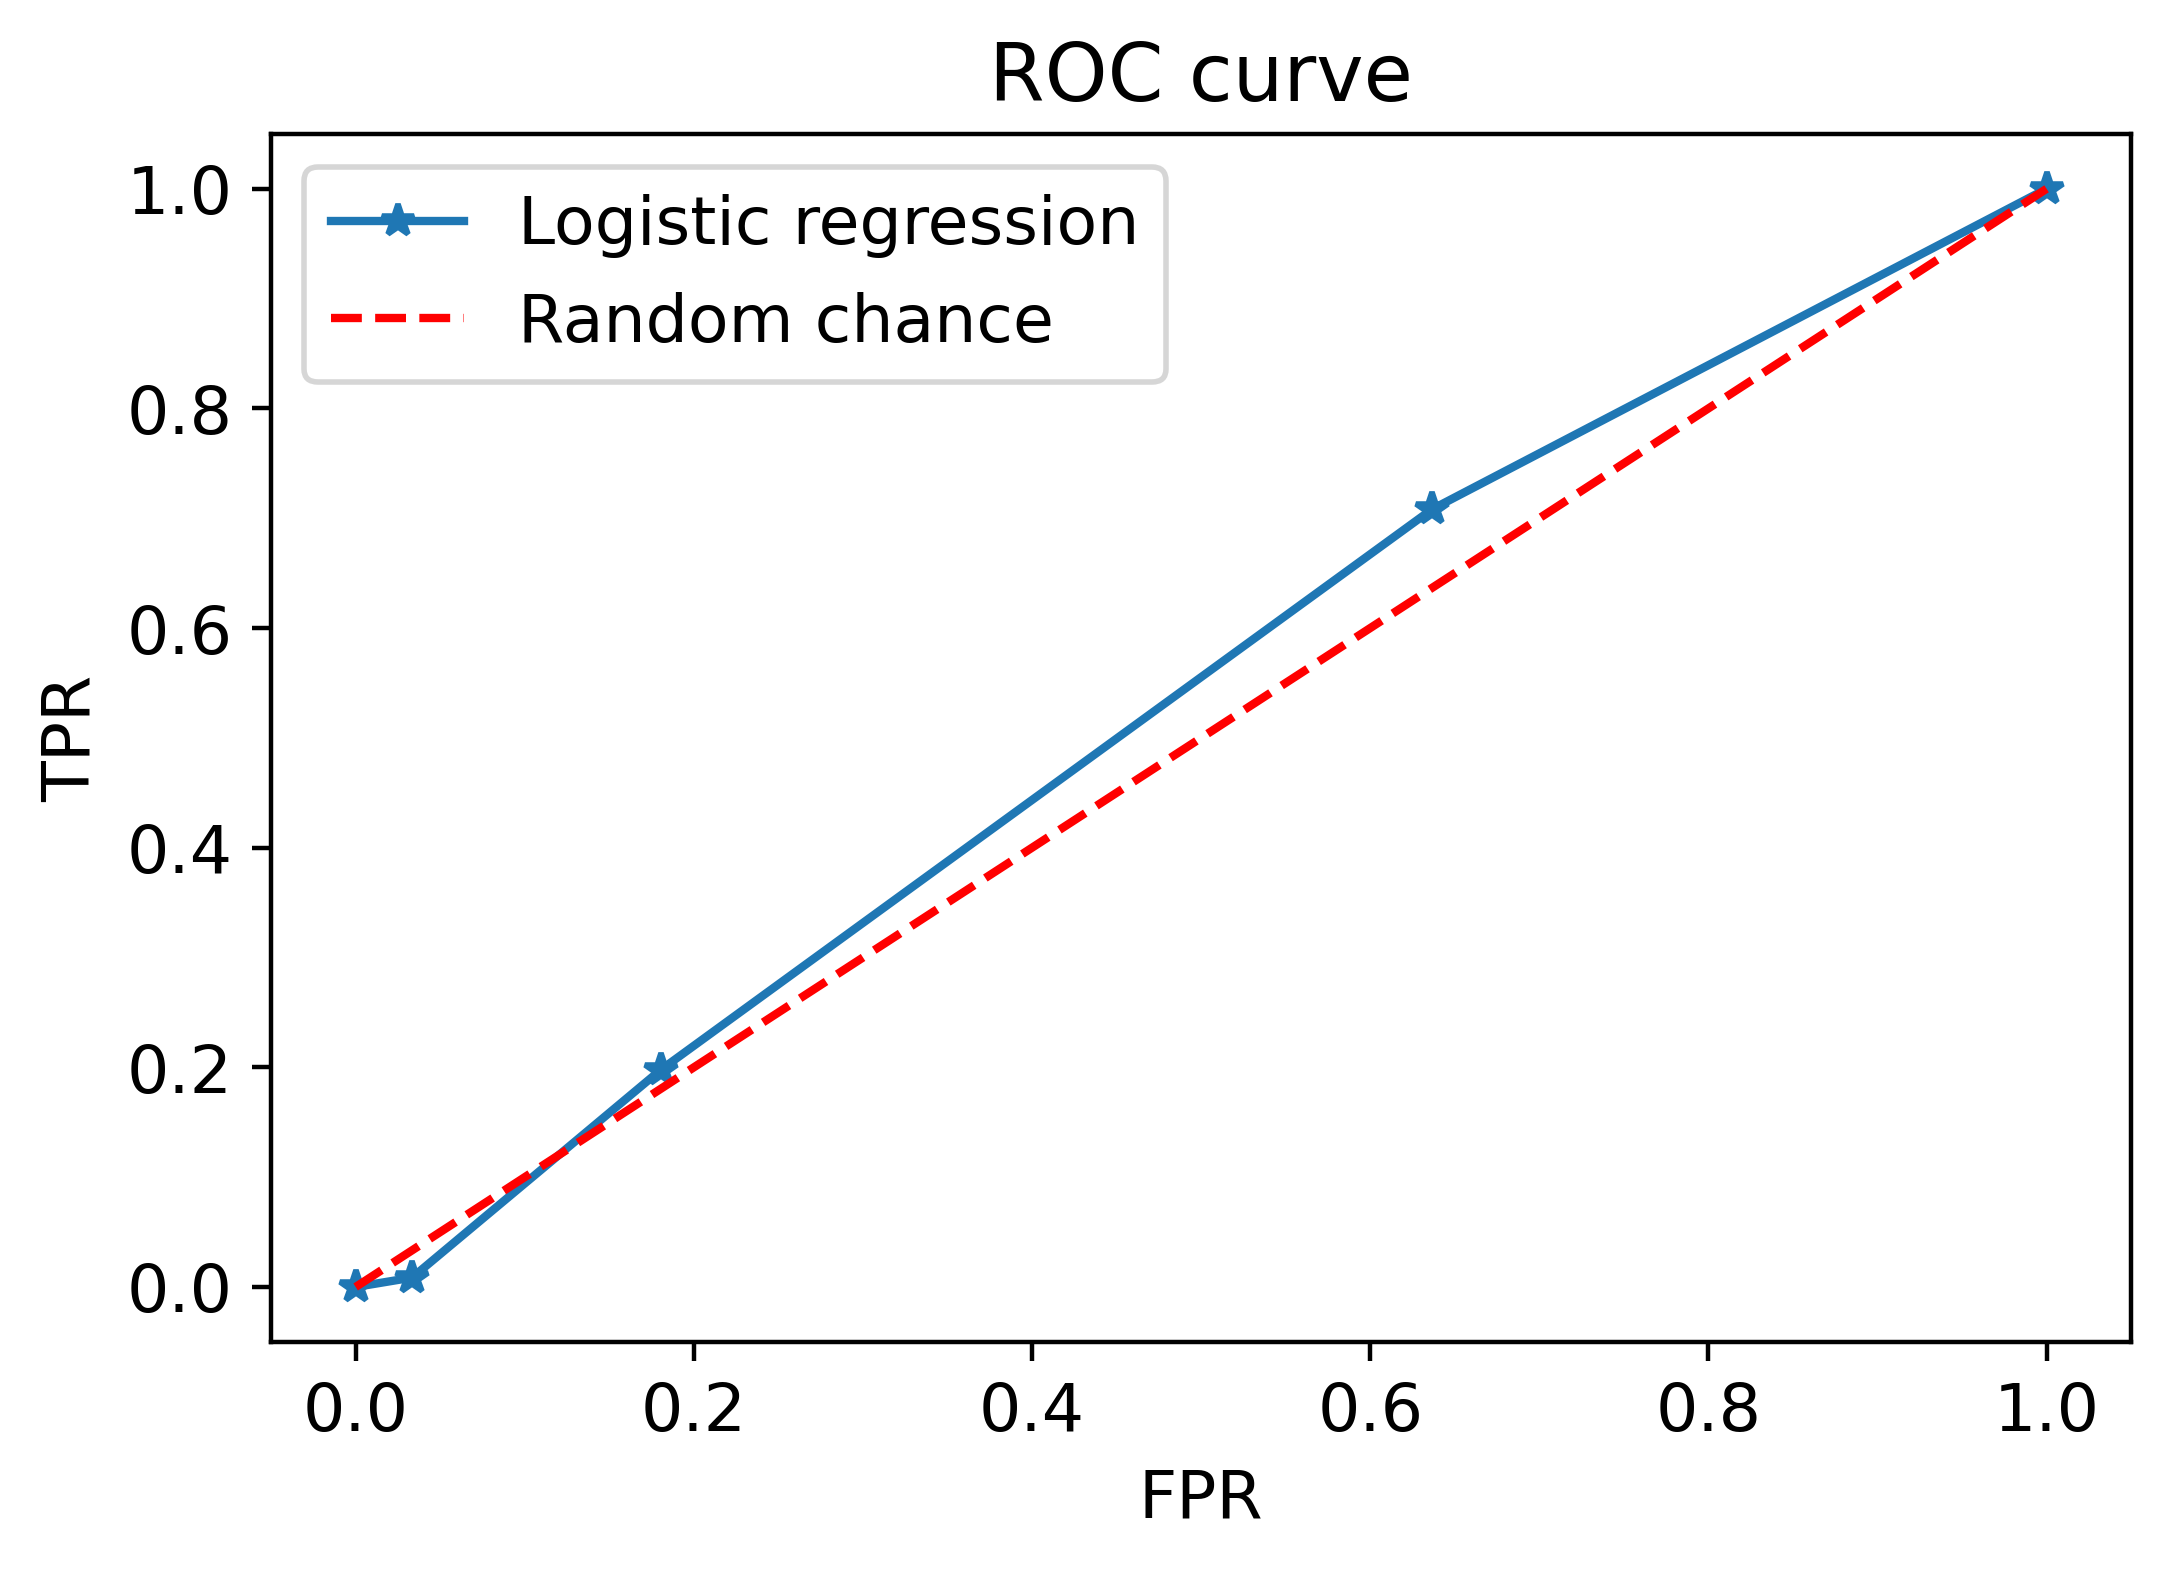

In [361]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [362]:
thresholds

array([1.23307934, 0.23307934, 0.22672023, 0.22048474, 0.2143732 ])

In [363]:
metrics.roc_auc_score(y_test, pos_proba)

0.532308472954804